<div style="border:solid green 2px; padding: 20px">

<b>Привет, Дарья! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

# Исследование данных сервиса аренды самокатов GoFast

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи —** [**`users_go.csv`**](https://code.s3.yandex.net/datasets/users_go.csv)

- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age - возраст
- city - город
- subscription_type - тип подписки (free, ultra)

**Поездки —** [**`rides_go.csv`**](https://code.s3.yandex.net/datasets/rides_go.csv)

- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки

**Подписки** — [**`subscriptions_go.csv`**](https://code.s3.yandex.net/datasets/subscriptions_go.csv)

- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Загрузка данных

In [2]:
# Откроем CSV-файлы и сохраним их в датафреймы
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
# Выведем на экран первые 5 строк всех датафреймов
display(users.head())
display(rides.head())
display(subscriptions.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
# Выведем на экран общую информацию о датафреймах
print('Общая информация о датафрейме \'users\'')
users.info()
print()
print('Общая информация о датафрейме \'rides\'')
rides.info()
print()
print('Общая информация о датафрейме \'subscriptions\'')
subscriptions.info()

Общая информация о датафрейме 'users'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB

Общая информация о датафрейме 'rides'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB

Общая информация о датафрейме 

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Замечательно, что знакомишься с датафреймом выводя и несколько первых строк и обзорную информацию при помощи `info`

Исходя из информации выше, можем заметить, что имена столбцов заданы корректно, а в данных нет пропусков.

## Предобработка данных

### Работа с типами данных

In [5]:
# Приведем столбец 'date' к типу даты pandas
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

# Проверим, прошли ли изменения
print('Общая информация о датафрейме \'rides\'')
rides.info()

Общая информация о датафрейме 'rides'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Изменение типов данных прошло успешно.

### Работа с пропущенными значениями и дубликатами

В предыдущем разделе мы обнаружили, что пропущенные значения отсутствуют. Проверим наличие дубликатов.

In [6]:
# Проверим, есть ли в датафреймах дубликаты
print(f'В датафрейме \'users\' {users.duplicated().sum()} дубликат(-ов)')
print(f'В датафрейме \'rides\' {rides.duplicated().sum()} дубликат(-ов)')
print(f'В датафрейме \'subscriptions\' {subscriptions.duplicated().sum()} дубликат(-ов)')

В датафрейме 'users' 31 дубликат(-ов)
В датафрейме 'rides' 0 дубликат(-ов)
В датафрейме 'subscriptions' 0 дубликат(-ов)


In [7]:
# Выведем на экран строки-дубликаты
users.loc[users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
И про дубликаты не забываешь, замечательно. Но действия по первичному анализу датафреймов схожи, можно было бы функцию написать 

В одном городе может быть несколько людей с одинаковым именем и возрастом. Поэтому, т.к. в датафрейме отсутствует столбец с фамилиями пользователей, делаем предположение о том, что под строками-дубликатами могут скрываться разные пользователи. Принимаем решение о том, чтобы оставить дубликаты. 

### Работа со столбцами

In [8]:
# Создадим новый столбец с номером месяца на основе столбца date
rides['month_ride'] = pd.DatetimeIndex(rides['date']).month

# Проверим, прошли ли изменения
display(rides.head())

,user_id,distance,duration,date,month_ride
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Все изменения прошли, новый столбец отображается корректно.

## Исследовательский анализ данных

### Частота встречаемости городов

city
Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: city, dtype: int64

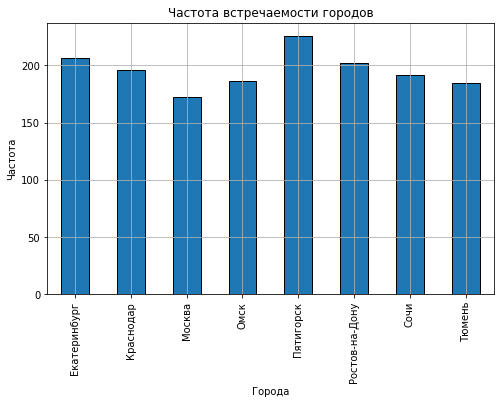

In [9]:
# Выведем на экран все уникальные значения городов с количеством встречаемости в датафрейме, отсортированные по убыванию
display(users.groupby('city')['city'].count().sort_values(ascending=False))

# Построем график
users.groupby('city')['city'].count().plot(
    x='city', 
    kind='bar', 
    title='Частота встречаемости городов', 
    xlabel='Города', 
    ylabel='Частота', 
    figsize=(8, 5), 
    grid=True, 
    ec='black'
);
plt.show()

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу нанести на графики подписи осей, добавить заголовок. Чтобы разобраться с подписями рекомендую вот [эту статью](https://devpractice.ru/matplotlib-lesson-3-3-text-elements/)

    
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Большое спасибо за ссылку! Добавила на этот и все последующие графики.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Отлично, это будет важно и ревьюерам следующих проектов. Ещё хорошо сортировать значения на столбчатой диаграмме, так информацию с графика считывать легче
</div>

Наибольшее число пользователей сервиса - из Пятигорска. Наименьшее - из Москвы. Возможно, это связано с высокой конкуренцией в Москве или недавней датой появления сервиса в этом городе.

### Соотношение пользователей с подпиской и без подписки

,subscription,counts,relation
0,free,846,0.540575
1,ultra,719,0.459425


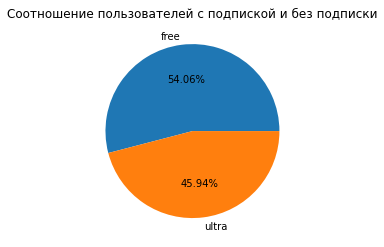

In [10]:
# Выведем на экран все уникальные значения в столбце 'subscription_type' и их количество методом value_counts() (для разнообразия)
users_subscription_relation = users['subscription_type'].value_counts().rename_axis('subscription').reset_index(name='counts')
users_subscription_relation['relation'] = users_subscription_relation['counts'] / (users_subscription_relation['counts'].sum())
display(users_subscription_relation)

# Построем график
users_subscription_relation['relation'].plot(
    kind='pie',
    labels=users_subscription_relation['subscription'],
    title='Соотношение пользователей с подпиской и без подписки', 
    autopct='%1.2f%%',
    ylabel='',
);
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Рекомендую параметр `autopct`, позволяет добавить подписи секторов на график, отлично смотрится!

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Спасибо! Добавила
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Благодарю за повышение информативности
</div>

Мы наглядно видим, что количество пользователей с подпиской ultra и без подписки - почти одинаковое. Пользователей без подписки незначительно, но больше.

### Возраст пользователей

In [11]:
# Сначала выведем общую информацию из этого столбца, чтобы определить возрастные промежутки для дальнейшей категоризации
users['age'].describe()

count    1565.000000
mean       24.922045
std         4.553496
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Средний возраст пользователей - 25 лет. Минимальный возрат - 12 лет, максимальный - 43.

Разделим данные на четыре группировки: 
- до 18 лет не включительно (дети)
- от 18 до 24 (студенты)
- от 25 до 29 (молодежь)
- 30 и более (взрослые)

,age_group,counts
0,от 18 до 24,646
1,от 25 до 29,594
2,30 и более,246
3,до 18,79


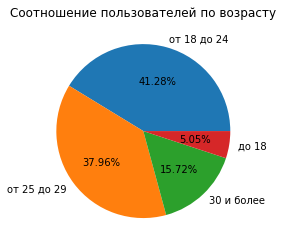

In [12]:
# Создадим функцию для категоризации возраста
def age_group(age):
    if age < 18:
        return 'до 18'
    if 18 <= age < 25:
        return 'от 18 до 24'
    if 25 <= age < 30:
        return 'от 25 до 29'
    if age >= 30:
        return '30 и более'

# Применим функцию age_group к столбцу 'age' датафрейма 'users'
users['age_group'] = users['age'].apply(age_group)

# Посчитаем количество пользователей в каждой возрастной категории
users_age_group = users['age_group'].value_counts().rename_axis('age_group').reset_index(name='counts')
display(users_age_group)

# Построем график
users_age_group['counts'].plot(
    kind='pie',
    labels=users_age_group['age_group'],
    title='Соотношение пользователей по возрасту', 
    autopct='%1.2f%%',
    ylabel='',
);
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

А зачем делишь набор значений на отдельные диапазоны?
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Так по категориям проще понимать, к какой группе относятся пользователи (подростки / студенты и т.д.), т.к. у них схожее поведение и по категориям проще анализировать. Но если не нужно - могу переделать!
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Идея понятна, просто и здесь и в дистанции и во времени поездок появились дополнительныые диапазоны и было интересно почему так

</div>

В основном сервисом пользуются студенты и молодежь: примерно одинаковое количество пользователей в возрастных категориях от 18 до 24 и от 25 до 29 лет.

### Расстояние, которое пользователь преодолел за одну поездку

In [13]:
# Сначала выведем общую информацию из этого столбца 'distance' датафрейма 'rides', чтобы определить промежутки для дальнейшей категоризации
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Самая короткая поездка - 850 м, самая дальняя - 7 км. В среднем пользователи берут самокат для поездок на 3 км, основной коридор - от 2.5 до 3.5 км.

Разделим поездки на категории:
- до 1 км
- от 1 до 2 км
- от 2 до 3 км
- от 3 до 4 км
- от 4 км

,distance_group,counts
0,от 3 до 4 км,6698
1,от 2 до 3 км,5540
2,от 4 км,3478
3,до 1 км,1372
4,от 1 до 2 км,980


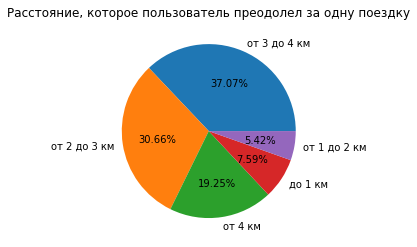

In [14]:
# Создадим функцию для категоризации дистанции всех поездок
def distance_group(distance):
    if distance < 1000:
        return 'до 1 км'
    if 1000 <= distance < 2000:
        return 'от 1 до 2 км'
    if 2000 <= distance < 3000:
        return 'от 2 до 3 км'
    if 3000 <= distance < 4000:
        return 'от 3 до 4 км'
    if distance >= 4000:
        return 'от 4 км'

# Применим функцию distance_group к столбцу 'distance' датафрейма 'rides'
rides['distance_group'] = rides['distance'].apply(distance_group)

# Посчитаем количество поездок в каждой категории дистанций
rides_distance_group = rides['distance_group'].value_counts().rename_axis('distance_group').reset_index(name='counts')
display(rides_distance_group)

# Построем график
rides_distance_group['counts'].plot(
    kind='pie', 
    labels=rides_distance_group['distance_group'],
    title='Расстояние, которое пользователь преодолел за одну поездку', 
    autopct='%1.2f%%',
    ylabel='',
);
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Для деления можно использовать методы `cut`, `qcut`, очень удобно

Короткие поездки совершаются реже остальных. Если пользователи и берут самокат в аренду, то в основном для более длительных поездок: на 2-4 км.

### Продолжительность поездок

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


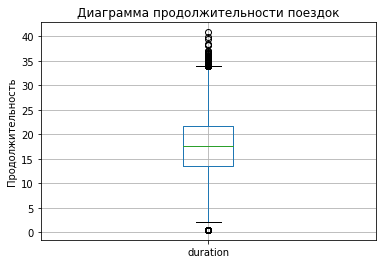

In [15]:
# Выведем общую информацию столбца 'duration' датафрейма 'rides'
print(rides['duration'].describe())

# Построим диаграмму размаха для столбца 'duration'
rides['duration'].plot(
    kind='box',
    title='Диаграмма продолжительности поездок',
    ylabel='Продолжительность',
    grid=True,
);

Минимальное значение - полминуты (30 секунд). Вероятно, кто-то просто пробовал сервис. Максимальная продолжительность поездки составила 40 минут. Но, исходя из графика, поездки более 34 минут скорее исключение. В среднем пользователи используют самокат в течение 17 минут.

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Красным, так как критически хочу обратить внимание на этот аспект.
    
Генерировать гипотезы, которые объясняют закономерности, аномалии - отличное стремление. Но если то, что ты предполагаешь можно проверить по имеющимся данным, то лучше сначала проверять, а потом утверждать, чтобы не подталкивать к неверным выводам.


Здесь это про расстояние крайне коротких по времени поездок
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Поняла! Новый вывод добавила ниже, строку с гипотезой удалила. Старый вывод оставила выше (на всякий случай).
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Спасибо, можно было бы посмотреть на дистанции этих сверх коротких по времени поездок, там есть кое-что интересное

</div>

Минимальная длительность поездки - полминуты (30 секунд). Максимальная продолжительность поездки составила 40 минут. Но, исходя из графика, поездки менее 1 минуты и более 34 минут скорее исключение. В среднем пользователи используют самокат в течение 17 минут.

## Объединение данных

### Объединие данных о пользователях, поездках и подписках

In [16]:
# Используем метод merge() для объединения датафреймов 'users' и 'rides'
combined_df = users.merge(rides, on='user_id')

# Проведем второе объединение: новосозданный 'combined_df' и 'subscriptions'
combined_df = combined_df.merge(subscriptions, on='subscription_type')

# Округлим значения продолжительности поездки
combined_df['duration'] = np.ceil(combined_df['duration'])

# Выведем на экран первые пять сторок, чтобы проверить объединение
combined_df.head(15)

,user_id,name,age,city,subscription_type,age_group,distance,duration,date,month_ride,distance_group,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,от 18 до 24,4409.919140,26.0,2021-01-01,1,от 4 км,6,0,199
1,1,Кира,22,Тюмень,ultra,от 18 до 24,2617.592153,16.0,2021-01-18,1,от 2 до 3 км,6,0,199
2,1,Кира,22,Тюмень,ultra,от 18 до 24,754.159807,7.0,2021-04-20,4,до 1 км,6,0,199
3,1,Кира,22,Тюмень,ultra,от 18 до 24,2694.783254,19.0,2021-08-11,8,от 2 до 3 км,6,0,199
4,1,Кира,22,Тюмень,ultra,от 18 до 24,4028.687306,27.0,2021-08-28,8,от 4 км,6,0,199
5,1,Кира,22,Тюмень,ultra,от 18 до 24,2770.890808,17.0,2021-10-09,10,от 2 до 3 км,6,0,199
6,1,Кира,22,Тюмень,ultra,от 18 до 24,3039.020292,15.0,2021-10-19,10,от 3 до 4 км,6,0,199
7,1,Кира,22,Тюмень,ultra,от 18 до 24,2842.118050,24.0,2021-11-06,11,от 2 до 3 км,6,0,199
8,1,Кира,22,Тюмень,ultra,от 18 до 24,3412.690668,16.0,2021-11-14,11,от 3 до 4 км,6,0,199
9,1,Кира,22,Тюмень,ultra,от 18 до 24,748.690645,16.0,2021-11-22,11,до 1 км,6,0,199


<div class="alert alert-info"> <b>Комментарий студента:</b> 

Ниже был комментарий о том, что необходимо добавить проверку, что после соединения таблиц не возникли пропуски, что размер объединенной таблице соответствует ожиданиям. Добавила сюда, т.к. ниже идет построение таблиц на основе этого датафрейма.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Всё оказалось в порядке по данным

</div>

In [17]:
# Проверим полученный датафрейм на наличие дублткатов
print(f'Найдено дубликатов: {combined_df.duplicated().sum()}')
print()

# Проверим полученный датафрейм на наличие пропусков
print('Найдено пропусков:')
print(combined_df.isna().sum())
print()

# Проверим размер таблицы
print(f'Размер таблицы: {combined_df.shape}')

Найдено дубликатов: 320

Найдено пропусков:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
age_group            0
distance             0
duration             0
date                 0
month_ride           0
distance_group       0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Размер таблицы: (18388, 14)


В созданном датафрейме найдено 320 дубликатов. Также ожидалось, что количество строк будет составлять 18068 (по размеру исходного датафрейма `rides`), однако сейчас 18388 строк, что на 320 больше ожидаемого. Принимаем решение удалить 320 строк-дубликатов.

In [18]:
# Удалим дубликаты
combined_df = combined_df.drop_duplicates().reset_index(drop=True)

# Еще раз проверим датафрейм на наличие дублткатов
print(f'Найдено дубликатов: {combined_df.duplicated().sum()}')
print()

# Еще раз проверим размер таблицы
print(f'Размер таблицы: {combined_df.shape}')

Найдено дубликатов: 0

Размер таблицы: (18068, 14)


Объединение прошло успешно, теперь на каждую поездку есть данные о пользователе, который ее совершал, и типе подписке со стоимостями. Дубликатов, пропусков не найдено, размер таблицы соответствует ожидаемому.

### Датафреймы с данными о пользователях с подпиской и без

#### Создание датафрейма с данными о пользователях без подписки

In [19]:
# Используем метод query() для создания среза данных с типом подписки 'free'
free_subscription_users = combined_df.query('subscription_type == "free"')

# Для дальнейшего построения графиков переименуем столбцы 'distance' и 'duration'
free_subscription_users = free_subscription_users.rename(columns={
    'distance': 'free_subscription_distance',
    'duration': 'free_subscription_duration'
})

# Проверим полученый датасет
display(free_subscription_users.head())

,user_id,name,age,city,subscription_type,age_group,free_subscription_distance,free_subscription_duration,date,month_ride,distance_group,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,от 18 до 24,2515.690719,15.0,2021-01-02,1,от 2 до 3 км,8,50,0
6501,700,Айдар,22,Омск,free,от 18 до 24,846.932642,17.0,2021-02-01,2,до 1 км,8,50,0
6502,700,Айдар,22,Омск,free,от 18 до 24,4004.434142,21.0,2021-02-04,2,от 4 км,8,50,0
6503,700,Айдар,22,Омск,free,от 18 до 24,1205.911290,10.0,2021-02-10,2,от 1 до 2 км,8,50,0
6504,700,Айдар,22,Омск,free,от 18 до 24,3047.379435,18.0,2021-02-14,2,от 3 до 4 км,8,50,0


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Прошу ещё добавить проверку, что после соединения таблиц не возникли пропуски, что размер объъединенной таблице соответствует ожиданиям

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Добавила строки кода выше, в п 4.1 (упоминала этот комментарий).
    
</div>

#### Создание датафрейма с данными о пользователях с подпиской

In [20]:
# Используем метод query() для создания среза данных с типом подписки 'ultra'
ultra_subscription_users = combined_df.query('subscription_type == "ultra"')


# Для дальнейшего построения графиков переименуем столбцы 'distance' и 'duration'
ultra_subscription_users = ultra_subscription_users.rename(columns={
    'distance': 'ultra_subscription_distance',
    'duration': 'ultra_subscription_duration'
})

# Проверим полученый датасет
ultra_subscription_users.head()

,user_id,name,age,city,subscription_type,age_group,ultra_subscription_distance,ultra_subscription_duration,date,month_ride,distance_group,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,от 18 до 24,4409.919140,26.0,2021-01-01,1,от 4 км,6,0,199
1,1,Кира,22,Тюмень,ultra,от 18 до 24,2617.592153,16.0,2021-01-18,1,от 2 до 3 км,6,0,199
2,1,Кира,22,Тюмень,ultra,от 18 до 24,754.159807,7.0,2021-04-20,4,до 1 км,6,0,199
3,1,Кира,22,Тюмень,ultra,от 18 до 24,2694.783254,19.0,2021-08-11,8,от 2 до 3 км,6,0,199
4,1,Кира,22,Тюмень,ultra,от 18 до 24,4028.687306,27.0,2021-08-28,8,от 4 км,6,0,199


#### Анализ информации о расстоянии поездок для пользователей обеих категорий

Информация о расстоянии поездок пользователей без подписки:
count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: free_subscription_distance, dtype: float64

Информация о расстоянии поездок пользователей с подпиской ultra:
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: ultra_subscription_distance, dtype: float64


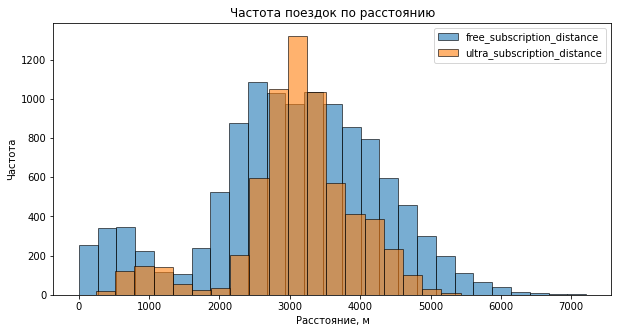

In [21]:
# Выведем общую информацию для столбца 'distance'
print('Информация о расстоянии поездок пользователей без подписки:')
print(free_subscription_users['free_subscription_distance'].describe())
print()
print('Информация о расстоянии поездок пользователей с подпиской ultra:')
print(ultra_subscription_users['ultra_subscription_distance'].describe())

# Построим гистограмму для столбца 'distance'
plot_distance = free_subscription_users['free_subscription_distance'].plot(
    kind='hist',
    bins=27,
    legend=True,
    alpha=0.6,
    ec='black',
    figsize=(10,5)
);

ultra_subscription_users['ultra_subscription_distance'].plot(
    kind='hist',
    bins=20, 
    legend=True,
    alpha=0.6,
    ec='black',
    figsize=(10,5)
);

plot_distance.set_title('Частота поездок по расстоянию')
plot_distance.set_xlabel('Расстояние, м')
plot_distance.set_ylabel('Частота')
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Отличная идея на одном графике отобразить оба тарифа, так их максимально удобно сравнивать, спасибо!
* На графиках отлично смотрится среднее или медиана, как дополнительное опорной значение, вот [тут](https://stackoverflow.com/questions/16930328/vertical-horizontal-lines-in-matplotlib) можно посмотреть, как добавить такую визуализацию

Пользователи без подписки почти в два раза чаще совершают поездки, чем пользователи с подпиской ultra. Т.к. количество значений для первой группы составило 11716, для второй 6672. А ранее, в п. 3.2 мы выяснили, что количество пользователей из двух этих категорий одинаковое.

Пользователи обеих категорий в среднем проезжают 3 км. 
На графике виден небольшой всплеск около значения 1 км. Пользователи ездят не только на большие расстояния, но и берут самокат покататься, не уезжая далеко. Однако для пользователей без подписки пик немного смещен влево. Это может говорить о том, что сначала пользователи тестируют сервис и совершают короткие поездки, чтобы попробовать, а только потом берут самокат, чтобы поехать подальше, или же приобретают подписку.

#### Анализ информации о времени поездок для пользователей обеих категорий

Информация о времени поездок пользователей без подписки:
count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: free_subscription_duration, dtype: float64

Информация о времени поездок пользователей с подпиской ultra:
count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: ultra_subscription_duration, dtype: float64


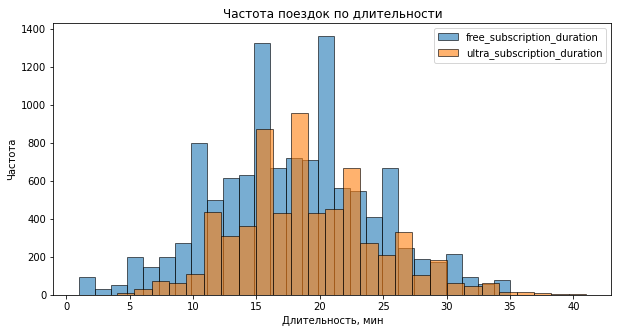

In [22]:
# Выведем общую информацию для столбца 'duration'
print('Информация о времени поездок пользователей без подписки:')
print(free_subscription_users['free_subscription_duration'].describe())
print()
print('Информация о времени поездок пользователей с подпиской ultra:')
print(ultra_subscription_users['ultra_subscription_duration'].describe())

# Построим гистограмму для столбца 'duration'
plot_duration = free_subscription_users['free_subscription_duration'].plot(
    kind='hist',
    bins=27,
    legend=True,
    alpha=0.6,
    ec='black',
    figsize=(10,5)
);


ultra_subscription_users['ultra_subscription_duration'].plot(
    kind='hist',
    bins=27,
    legend=True,
    alpha=0.6,
    ec='black',
    figsize=(10,5)
);

plot_duration.set_title('Частота поездок по длительности')
plot_duration.set_xlabel('Длительность, мин')
plot_duration.set_ylabel('Частота')
plt.show()

Для обоих категорий пользователей распределение похожее, однако частота для пользователей с подпиской меньше, т.к. они совершают поездки в два раза реже. Средняя длительность поездки для обоих категорий - 18 минут.

## Подсчёт выручки

In [23]:
# Создадим сгруппированную таблицу с с агрегированными данными о поездках по 'user_id' и 'month_ride'
combined_df_grouped = combined_df.groupby(['user_id', 'month_ride', 'subscription_type']).agg({'month_ride': ['count'], 'distance' : ['sum'], 'duration' : ['sum']})

# Перезапишем датафрейм с новыми индексами для дальнейших действий
combined_df_grouped = combined_df_grouped.rename_axis(['user_id', 'month_ride', 'subscription_type']).reset_index()

# Переименуем столбцы
combined_df_grouped.columns = ['user_id', 'month_ride', 'subscription_type', 'amount_of_rides', 'distance', 'duration']

# Добавим в таблицу информацию о типе подписок и их стоимостях
combined_df_grouped = combined_df_grouped.merge(subscriptions, on=['subscription_type'], how='inner')

# ПЕРЕНЕСЛА ЭТОТ ШАГ ВЫШЕ, В ДАТАФРЕЙМ combined_df - Округлим значения продолжительности поездки
#combined_df_grouped['duration'] = np.ceil(combined_df_grouped['duration'])

# Выведем на экран полученный датафрейм
combined_df_grouped.head(10)

,user_id,month_ride,subscription_type,amount_of_rides,distance,duration,minute_price,start_ride_price,subscription_fee
0,1,1,ultra,2,7027.511294,42.0,6,0,199
1,1,4,ultra,1,754.159807,7.0,6,0,199
2,1,8,ultra,2,6723.470560,46.0,6,0,199
3,1,10,ultra,2,5809.911100,32.0,6,0,199
4,1,11,ultra,3,7003.499363,56.0,6,0,199
5,1,12,ultra,2,6751.629942,28.0,6,0,199
6,2,3,ultra,3,10187.723006,63.0,6,0,199
7,2,4,ultra,2,6164.381824,40.0,6,0,199
8,2,6,ultra,1,3255.338202,14.0,6,0,199
9,2,7,ultra,2,6780.722964,48.0,6,0,199


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Округление ожидалось до агрегации, ещё на этапе датафрейма `combined_df`
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Поняла! Перенесла этот шаг выше, на этап создания `combined_df` (п. 4.1)
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Теперь доходы соответствуют ожиданиям

</div>

In [24]:
# Добавим столбец с выручкой по месяцам
combined_df_grouped['revenue'] = combined_df_grouped['subscription_fee'] + combined_df_grouped['start_ride_price']*combined_df_grouped['amount_of_rides'] + combined_df_grouped['minute_price']*combined_df_grouped['duration']

# Выведем на экран полученный датафрейм
combined_df_grouped.head(10)

,user_id,month_ride,subscription_type,amount_of_rides,distance,duration,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,ultra,2,7027.511294,42.0,6,0,199,451.0
1,1,4,ultra,1,754.159807,7.0,6,0,199,241.0
2,1,8,ultra,2,6723.470560,46.0,6,0,199,475.0
3,1,10,ultra,2,5809.911100,32.0,6,0,199,391.0
4,1,11,ultra,3,7003.499363,56.0,6,0,199,535.0
5,1,12,ultra,2,6751.629942,28.0,6,0,199,367.0
6,2,3,ultra,3,10187.723006,63.0,6,0,199,577.0
7,2,4,ultra,2,6164.381824,40.0,6,0,199,439.0
8,2,6,ultra,1,3255.338202,14.0,6,0,199,283.0
9,2,7,ultra,2,6780.722964,48.0,6,0,199,487.0


Получили таблицу с выручкой по каждому пользователю помесячно.

## Проверка гипотез

### Гипотеза о том, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки

**Нулевая гипотеза (H0):** Среднее время поездки пользователя с подпиской Ultra и среднее время поездки пользователя без подписки равны.

**Альтернативная гипотеза (H1):** Среднее время поездки пользователя с подпиской Ultra больше, чем среднее время поездки пользователя без подписки.

Подготовим датафреймы для проверки гипотез. Создадим сгруппированные датафреймы со средним временем поездки для пользователей с подпиской ultra и без нее.

In [25]:
# Создадим датафрейм с разбивкой по каждому пользователю без подписки
#free_subscription_users_grouped = free_subscription_users.groupby('user_id').agg({'free_subscription_distance': ['mean'], 'free_subscription_duration': ['mean']}).reset_index()

# Переименуем столбцы
#free_subscription_users_grouped.columns = ['user_id', 'user_mean_distance', 'user_mean_duration']

# Выведем на экран полученный датафрейм
#display(free_subscription_users_grouped.head())

In [26]:
# Создадим датафрейм с разбивкой по каждому пользователю с подпиской ultra
#ultra_subscription_users_grouped = ultra_subscription_users.groupby('user_id').agg({'ultra_subscription_distance': ['mean'], 'ultra_subscription_duration': ['mean']}).reset_index()

# Переименуем столбцы
#ultra_subscription_users_grouped.columns = ['user_id', 'user_mean_distance', 'user_mean_duration']

# Выведем на экран полученный датафрейм
#display(ultra_subscription_users_grouped.head())

In [27]:
# Зададим уровень статистической значимости
alpha = 0.05 

# Проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(
    ultra_subscription_users['ultra_subscription_duration'], 
    free_subscription_users['free_subscription_duration'],
    alternative = 'greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Проверка предполагалась по всем поездкам, без дополнительно предварительной агрегации по пользователям
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Шаги, где проводила предварительную агрегацию, закомментировала. Код с гипотезой исправила.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Отлично
</div>

Полученное значение p-value значительно меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Среднее время поездки пользователя с подпиской Ultra больше, чем среднее время поездки пользователя без подписки.

### Расстояние одной поездки

**Нулевая гипотеза (H0):** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.

**Альтернативная гипотеза (H1):** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку меньше 3130 метров.

In [28]:
# Задаем необходимое значение расстояния
distance_value = 3130

# Зададим уровень статистической значимости
alpha = 0.05

results = st.ttest_1samp(
    ultra_subscription_users['ultra_subscription_distance'], 
    distance_value,
    alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.08046311521502146
Не отвергаем нулевую гипотезу


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️

Аналогично проверке первой гипотезы
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Шаги, где проводила предварительную агрегацию, закомментировала. Код с гипотезой исправила.
    
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v2:</b>⛅️ 

Здесь бизнесу было критичнее, чтобы дистанции не были более 3130, поэтому рекомендовал бы использовать альтернативную гипотезу - больше
</div>

Нулевая гипотеза подтвердилась. Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.

### Помесячная выручка

**Нулевая гипотеза (H0):** Помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки.
**Альтернативная гипотеза (H1):** Помесячная выручка от пользователей с подпиской больше, чем помесячная выручка от пользователей без подписки.

In [29]:
# Создадим датафрейм с разбивкой по каждому пользователю без подписки
combined_df_grouped_free = combined_df_grouped.query('subscription_type == "free"')

# Создадим датафрейм с разбивкой по каждому пользователю с подпиской ultra
combined_df_grouped_ultra = combined_df_grouped.query('subscription_type == "ultra"')

# Проверим, что получилось
display(combined_df_grouped_free.head())
display(combined_df_grouped_ultra.head())

,user_id,month_ride,subscription_type,amount_of_rides,distance,duration,minute_price,start_ride_price,subscription_fee,revenue
4533,700,1,free,1,2515.690719,15.0,8,50,0,170.0
4534,700,2,free,5,13446.659764,89.0,8,50,0,962.0
4535,700,3,free,1,3798.334905,19.0,8,50,0,202.0
4536,700,4,free,1,2984.551206,16.0,8,50,0,178.0
4537,700,6,free,2,5927.650988,29.0,8,50,0,332.0


,user_id,month_ride,subscription_type,amount_of_rides,distance,duration,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,ultra,2,7027.511294,42.0,6,0,199,451.0
1,1,4,ultra,1,754.159807,7.0,6,0,199,241.0
2,1,8,ultra,2,6723.470560,46.0,6,0,199,475.0
3,1,10,ultra,2,5809.911100,32.0,6,0,199,391.0
4,1,11,ultra,3,7003.499363,56.0,6,0,199,535.0


In [30]:
# Зададим уровень статистической значимости
alpha = 0.05 

# Проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(
    combined_df_grouped_ultra['revenue'], 
    combined_df_grouped_free['revenue'],
    alternative = 'greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, что формулируешь нулевую, альтернативную гипотезу, это важно, выводы верны, ещё могу порекомендовать дополнительно проверять себя и выводить среднее проверяемых переменных или распределения

Помесячная выручка от пользователей с подпиской больше, чем помесячная выручка от пользователей без подписки.

### Количество обращений в техподдержку

Если бы техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение, и нам было необходимо проверить гипотезу о том, что после этого количество обращений в техподдержку значимо снизилось, мы бы использовали scipy.stats.ttest_rel тест, чтобы проверить или опровергунть гипотезу равенстве среднего значения генеральной совокупности до и после изменения.

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

А как будет звучать альтернативная гипотеза получается? 
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> 

**Нулевая гипотеза (H0):** Среднее значение генеральной совокупности до изменений равно среднему генеральной совокупности после изменения.

**Альтернативная гипотеза (H1):** Среднее значение генеральной совокупности до изменений больше среднего значения генеральной совокупности после изменения.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   
Спасибо, что говоришь об односторонней гипотезе

</div>

# Выводы

Были проанализированы три датасета: с данными о пользователях, поездках и подписках сервиса.

В первую очередь была выполнена предобработка данных. Имена столбцов были заданы корректно, пропусков в данных не было. Затем мы изменили тип данных для столбца с датой и создали новый столбец с номером месяца. В ходе предобработки был найден 31 дубликат в датафрейме с данными о пользователях, однако в одном городе может быть несколько людей с одинаковым именем и возрастом. Поэтому, т.к. в датафрейме отсутствует столбец с фамилиями пользователей, было сделано предположение о том, что под строками-дубликатами могут скрываться разные пользователи и принято решение о том, чтобы оставить дубликаты.

Далее был проведен исследовательский анализ данных:
1. Частота встречаемости городов
2. Соотношение пользователей с подпиской и без подписки
3. Возраст пользователей
4. Расстояние, которое пользователь преодолел за одну поездку
5. Продолжительность поездок

Для каждого параметра были посчитаны уникальные значения, построены диаграммы и сделаны выводы.

- Наибольшее число пользователей сервиса - из Пятигорска. Наименьшее - из Москвы.
- Количество пользователей с подпиской ultra и без подписки - почти одинаковое. Пользователей без подписки незначительно, но больше.
- Средний возраст пользователей - 25 лет. Минимальный возрат - 12 лет, максимальный - 43. В основном сервисом пользуются студенты и молодежь: примерно одинаковое количество пользователей в возрастных категориях от 18 до 24 и от 25 до 29 лет. 
- Самая короткая поездка - 850 м, самая дальняя - 7 км. В среднем пользователи берут самокат для поездок на 3 км, основной коридор - от 2.5 до 3.5 км.
- Короткие поездки совершаются реже остальных. Если пользователи и берут самокат в аренду, то в основном для более длительных поездок: на 2-4 км. В среднем пользователи используют самокат в течение 17 минут.

После методом merge() был получен общий датафрейм с объединенными данными о пользователях, поездках и подписках. Затем, методом query() из общей таблицы были получены датафреймы с информацией о расстоянии поездок для пользователей с разным типом подписки. 

Была проанализирована информация о расстоянии и времени поездок для пользователей обеих категорий.
Пользователи без подписки почти в два раза чаще совершают поездки, чем пользователи с подпиской ultra. Т.к. количество значений для первой группы составило 11716, для второй 6672. А ранее, в п. 3.2 мы выяснили, что количество пользователей из двух этих категорий одинаковое. Пользователи обеих категорий в среднем проезжают 3 км. 
На графике виден небольшой всплеск около значения 1 км. Пользователи ездят не только на большие расстояния, но и берут самокат покататься, не уезжая далеко. Однако для пользователей без подписки пик немного смещен влево. Это может говорить о том, что сначала пользователи тестируют сервис и совершают короткие поездки, чтобы попробовать, а только потом берут самокат, чтобы поехать подальше, или же приобретают подписку. Средняя длительность поездки для обоих категорий - 18 минут.

Затем группировкой мы получили таблицу с выручкой по каждому пользователю помесячно. Для дальнейшей проверки гипотезы. 

В завершение были проверены три гипотезы и получены выводы:
- Среднее время поездки пользователя с подпиской Ultra больше, чем среднее время поездки пользователя без подписки.
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.
- Помесячная выручка от пользователей с подпиской больше, чем помесячная выручка от пользователей без подписки.